0.961864406779661
Start
University Chatbot: Hello! How can I assist you today?
You: tell me about nirma university
University Chatbot: Nirma University is home to various institutes known for their excellence in diverse fields. These institutes are:technology, design, management, architecture and planning, science, commerce, pharmacy.
You: can you give me information about technology institute
University Chatbot: Nirma University recognizes the importance of mental health and offers support services to students. The university provides counseling services, workshops on stress management, and resources for mental health awareness. Students can access confidential counseling sessions and participate in activities promoting overall well-being.
You: which programs are offered by technology
University Chatbot: Campus life at the Institute of Technology, Nirma University, is vibrant and engaging. Students can participate in various extracurricular activities and events. The institute fosters

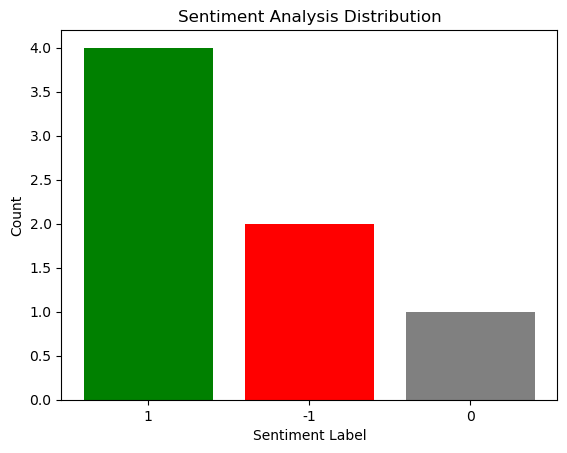

AI-related content detected in the text.


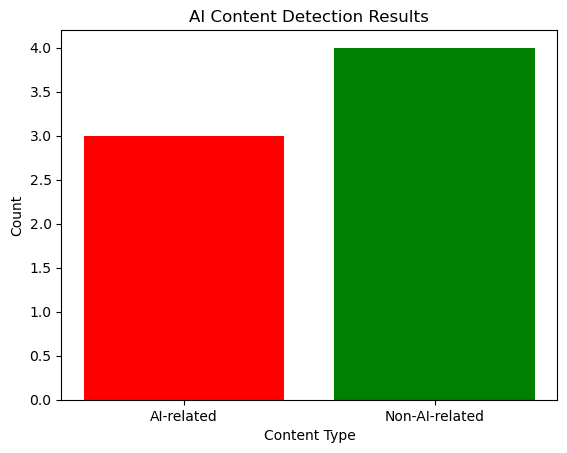

In [10]:
#import libraries 
import random
import json
import numpy as np
import nltk
import csv
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from sklearn.tree import DecisionTreeClassifier
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Initialize the WordNet Lemmatizer
lemmatizer = WordNetLemmatizer()

# Load the intents from a JSON file
intents = json.loads(open('Final_2511.json', encoding='utf-8').read())

# Lists to store words, classes, and documents
wrds = []
classes = []
documents = []

# Characters to ignore when tokenizing
ignore_letters = ['?', '!', '.', ',']

# Loop through intents to preprocess and tokenize text
for intent in intents['intents']:
    for pattern in intent['patterns']:
        word_list = word_tokenize(pattern)
        wrds.extend(word_list)
        documents.append((word_list, intent['tag']))
        if intent['tag'] not in classes:
            classes.append(intent['tag'])

# Lemmatize words and remove ignored characters
wrds = [lemmatizer.lemmatize(w) for w in wrds if w not in ignore_letters]

# Create a sorted set of unique words and classes
wrds = sorted(set(wrds))
classes = sorted(set(classes))

# Create training data
training = []
output_empty = [0] * len(classes)

for document in documents:
    bag = []
    word_patterns = document[0]
    word_patterns = [lemmatizer.lemmatize(word.lower()) for word in word_patterns]
    for word in wrds:
        bag.append(1) if word in word_patterns else bag.append(0)
    output_row = list(output_empty)
    output_row[classes.index(document[1])] = 1
    training.append([bag, output_row])

# Shuffle the training data
random.shuffle(training)
training = np.array(training, dtype=object)
train_x = list(training[:, 0])
train_y = list(training[:, 1])

# Create a Decision Tree Classifier
classifier = DecisionTreeClassifier(random_state=0, criterion='entropy')
classifier.fit(train_x, train_y)
pred_y = classifier.predict(train_x)

# Print the accuracy of the model
print(accuracy_score(train_y, pred_y))

# Define a function to clean up a sentence
def clean_up_sentence(sentence):
    sentence_words = nltk.word_tokenize(sentence)
    sentence_words = [lemmatizer.lemmatize(word) for word in sentence_words]
    return sentence_words

# Define a function to convert a sentence to a bag of words
def bag_of_words(sentence):
    sentence_words = clean_up_sentence(sentence)
    bag = [0] * len(wrds)
    for w in sentence_words:
        for i, word in enumerate(wrds):
            if word == w:
                bag[i] = 1
    return np.array(bag)

# Define a function to predict the intent of a sentence
def predict_class(sentence):
    bow = bag_of_words(sentence)
    res = classifier.predict(np.array([bow]).reshape(1, -1))[0]
    ERROR_THRESHOLD = 0.25
    results = [[i, r] for i, r in enumerate(res) if r > ERROR_THRESHOLD]
    results.sort(key=lambda x: x[1], reverse=True)
    return_list = []
    for r in results:
        return_list.append({'intentd': classes[r[0]], 'probability': str(r[1])})
    return return_list

# Define a function to get a response based on the predicted intent
def get_response(intent_list, intent_json):
    if intent_list:
        tag = intent_list[0]['intentd']
        list_of_intent = intent_json['intents']
        for i in list_of_intent:
            if i['tag'] == tag:
                result = random.choice(i['responses'])
                break
        return result
    else:
        return "I'm sorry, I didn't understand that."

# Main loop for the chatbot
print("Start")
print("University Chatbot: Hello! How can I assist you today?")
while True:
    message = input("You: ")
    if message.lower() == 'exit':
        print("University Chatbot: Goodbye!")
        break

    ints = predict_class(message)
    res = get_response(ints, intents)
    print("University Chatbot:", res)


# Initialize the Sentiment Intensity Analyzer
sia = SentimentIntensityAnalyzer()

# Create or open a CSV file to store the data
csv_filename = 'sentiment_analysis.csv'

print("Sentiment Analysis: Enter your text (type 'exit' to quit)")
with open(csv_filename, 'w', newline='') as csv_file:
    csv_writer = csv.writer(csv_file)
    csv_writer.writerow(['Response', 'Sentiment Label'])  # Write header

    while True:
        user_input = input("User: ")

        if user_input.lower() == 'exit':
            print("Goodbye!")
            break

        # Perform sentiment analysis using VADER
        sentiment_scores = sia.polarity_scores(user_input)

        # Determine the sentiment label based on the compound score
        compound_score = sentiment_scores['compound']
        if compound_score >= 0.05:
            sentiment_label = "1"
        elif compound_score <= -0.05:
            sentiment_label = "-1"
        else:
            sentiment_label = "0"

        # Store user response and sentiment label in the CSV file
        csv_writer.writerow([user_input, sentiment_label])
        
        print(f"Sentiment Label: {sentiment_label}")
#         print(f"Sentiment Scores: {sentiment_scores}")

# Read data from the CSV file
csv_filename = 'sentiment_analysis.csv'

responses = []
sentiment_labels = []

with open(csv_filename, 'r', newline='') as csv_file:
    csv_reader = csv.DictReader(csv_file)
    for row in csv_reader:
        responses.append(row['Response'])
        sentiment_labels.append(row['Sentiment Label'])

# Count sentiment labels
positive_count = sentiment_labels.count('1')
negative_count = sentiment_labels.count('-1')
neutral_count = sentiment_labels.count('0')

# Data for the bar chart
labels = ['1', '-1', '0']
counts = [positive_count, negative_count, neutral_count]

# Create a bar chart
plt.bar(labels, counts, color=['green', 'red', 'gray'])

# Add labels and title
plt.xlabel('Sentiment Label')
plt.ylabel('Count')
plt.title('Sentiment Analysis Distribution')

# Display the bar chart
plt.show()



# csv_filename = 'sentiment_analysis.csv'
data = pd.read_csv(csv_filename)

# Extract text responses and corresponding labels
X = data['Response']
y = data['Sentiment Label']

# Create a TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000)

# Transform the text responses
X_tfidf = tfidf_vectorizer.fit_transform(X)

# Create a Naive Bayes classifier for text classification
classifier = MultinomialNB()

# Train the classifier
classifier.fit(X_tfidf, y)

new_text = ["This is the project of AI-Powered Chatbot for the technical educational department."]
new_text_tfidf = tfidf_vectorizer.transform(new_text)
predicted_label = classifier.predict(new_text_tfidf)

if predicted_label[0] == 1:
    print("AI-related content detected in the text.")
else:
    print("No AI-related content found in the text.")

# Predict labels for all responses
predicted_labels = classifier.predict(X_tfidf)

# Visualize the results with a bar chart
labels = ['AI-related', 'Non-AI-related']
counts = [sum(predicted_labels), len(predicted_labels) - sum(predicted_labels)]

plt.bar(labels, counts, color=['red', 'green'])
plt.xlabel('Content Type')
plt.ylabel('Count')
plt.title('AI Content Detection Results')
plt.show()




In [13]:
# Import libraries
import random
import json
import numpy as np
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

# Initialize the WordNet Lemmatizer
lemmatizer = WordNetLemmatizer()

# Load the intents from a JSON file
intents = json.loads(open('Final_2511.json', encoding='utf-8').read())

# Lists to store words, classes, and documents
wrds = []
classes = []
documents = []

# Characters to ignore when tokenizing
ignore_letters = ['?', '!', '.', ',']

# Loop through intents to preprocess and tokenize text
for intent in intents['intents']:
    for pattern in intent['patterns']:
        word_list = word_tokenize(pattern)
        wrds.extend(word_list)
        documents.append((word_list, intent['tag']))
        if intent['tag'] not in classes:
            classes.append(intent['tag'])

# Lemmatize words and remove ignored characters
wrds = [lemmatizer.lemmatize(w.lower()) for w in wrds if w not in ignore_letters]

# Create a sorted set of unique words and classes
wrds = sorted(set(wrds))
classes = sorted(set(classes))

# Create training data
training = []
output_empty = [0] * len(classes)

for document in documents:
    bag = []
    word_patterns = document[0]
    word_patterns = [lemmatizer.lemmatize(word.lower()) for word in word_patterns]
    for word in wrds:
        bag.append(1) if word in word_patterns else bag.append(0)
    output_row = list(output_empty)
    output_row[classes.index(document[1])] = 1
    training.append([bag, output_row])

# Shuffle the training data
random.shuffle(training)
training = np.array(training, dtype=object)

# Separate features (X) and labels (y)
train_x = list(training[:, 0])
train_y = list(training[:, 1])

# Create a Decision Tree Classifier
classifier = DecisionTreeClassifier(random_state=0, criterion='entropy')
classifier.fit(train_x, train_y)
pred_y = classifier.predict(train_x)

# Print the accuracy of the model
print("Accuracy:", accuracy_score(train_y, pred_y))

# Define a function to clean up a sentence
def clean_up_sentence(sentence):
    sentence_words = nltk.word_tokenize(sentence)
    sentence_words = [lemmatizer.lemmatize(word) for word in sentence_words]
    return sentence_words

# Define a function to convert a sentence to a bag of words
def bag_of_words(sentence):
    sentence_words = clean_up_sentence(sentence)
    bag = [0] * len(wrds)
    for w in sentence_words:
        for i, word in enumerate(wrds):
            if word == w:
                bag[i] = 1
    return np.array(bag)

# Define a function to predict the intent of a sentence
def predict_class(sentence):
    bow = bag_of_words(sentence)
    res = classifier.predict(np.array([bow]).reshape(1, -1))[0]
    ERROR_THRESHOLD = 0.25
    results = [[i, r] for i, r in enumerate(res) if r > ERROR_THRESHOLD]
    results.sort(key=lambda x: x[1], reverse=True)
    return_list = []
    for r in results:
        return_list.append({'intentd': classes[r[0]], 'probability': str(r[1])})
    return return_list

# Define a function to get a response based on the predicted intent
def get_response(intent_list, intent_json):
    if intent_list:
        tag = intent_list[0]['intentd']
        list_of_intent = intent_json['intents']
        for i in list_of_intent:
            if i['tag'] == tag:
                result = random.choice(i['responses'])
                break
        return result
    else:
        return "I'm sorry, I didn't understand that."


# Main loop for the chatbot
print("Start")
print("University Chatbot: Hello! How can I assist you today?")
while True:
    message = input("You: ")
    if message.lower() == 'exit':
        print("University Chatbot: Goodbye!")
        break

    ints = predict_class(message)
    res = get_response(ints, intents)
    print("University Chatbot:", res)


Accuracy: 0.9957627118644068
Start
University Chatbot: Hello! How can I assist you today?
You: academcs
University Chatbot: Good to see you again!
You: timings of college
University Chatbot: Good to see you again!
You: for university 
University Chatbot: Nirma University offers a vibrant campus life with a variety of student clubs and organizations. These include academic clubs, cultural groups, and sports teams. Students can explore their interests, develop leadership skills, and build a sense of community by participating in extracurricular activities.
You: What programs does the Institute of Management offer?
University Chatbot: Receiving a scholarship at Nirma University comes with several benefits. Apart from the financial assistance, scholarships recognize and reward your achievements. Benefits may include partial or full tuition fee coverage, access to exclusive events, mentorship programs, and the opportunity to engage in special projects. Scholarships also enhance your resume 